<a href="https://colab.research.google.com/github/asiabak/Licencjat-modele/blob/main/CNN_z_wykresami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

In [ ]:
!pip install pandas==2.2.2
import os
os.kill(os.getpid(), 9)

Training CNN on reviews dataset...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.4354 - loss: 1.1334 - val_accuracy: 0.5104 - val_loss: 1.0815
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4873 - loss: 1.0809 - val_accuracy: 0.5104 - val_loss: 1.0660
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4623 - loss: 1.0849 - val_accuracy: 0.5104 - val_loss: 1.0528
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4954 - loss: 1.0446 - val_accuracy: 0.5136 - val_loss: 1.0607
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5142 - loss: 1.0039 - val_accuracy: 0.4736 - val_loss: 1.0546
CNN training completed in 10.47 seconds
Wykres zapisany w: cnn_reviews_history.png
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy for CNN model trained on reviews only: 0.4584
Training CNN on reviews + idioms dataset...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.4246 - loss: 1.1457 - val_accuracy: 0.4781 - val_loss: 1.0819
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4918 - loss: 1.0854 - val_accuracy: 0.5023 - val_loss: 1.0659
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4918 - loss: 1.0554 - val_accuracy: 0.5023 - val_loss: 1.0471
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5119 - loss: 1.0205 - val_accuracy: 0.5023 - val_loss: 1.0421
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5077 - loss: 1.0176 - val_accuracy: 0.4766 - val_loss: 1.0458
CNN training completed in 10.57 seconds
Wykres zapisany w: cnn_reviews_idioms_history.png
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Accuracy for CNN model trained on reviews + idioms: 0.5122

Model Performance Comparison:
Reviews Only:        0.4584
Reviews with Idioms: 0.5122
Improvement:         5.38%


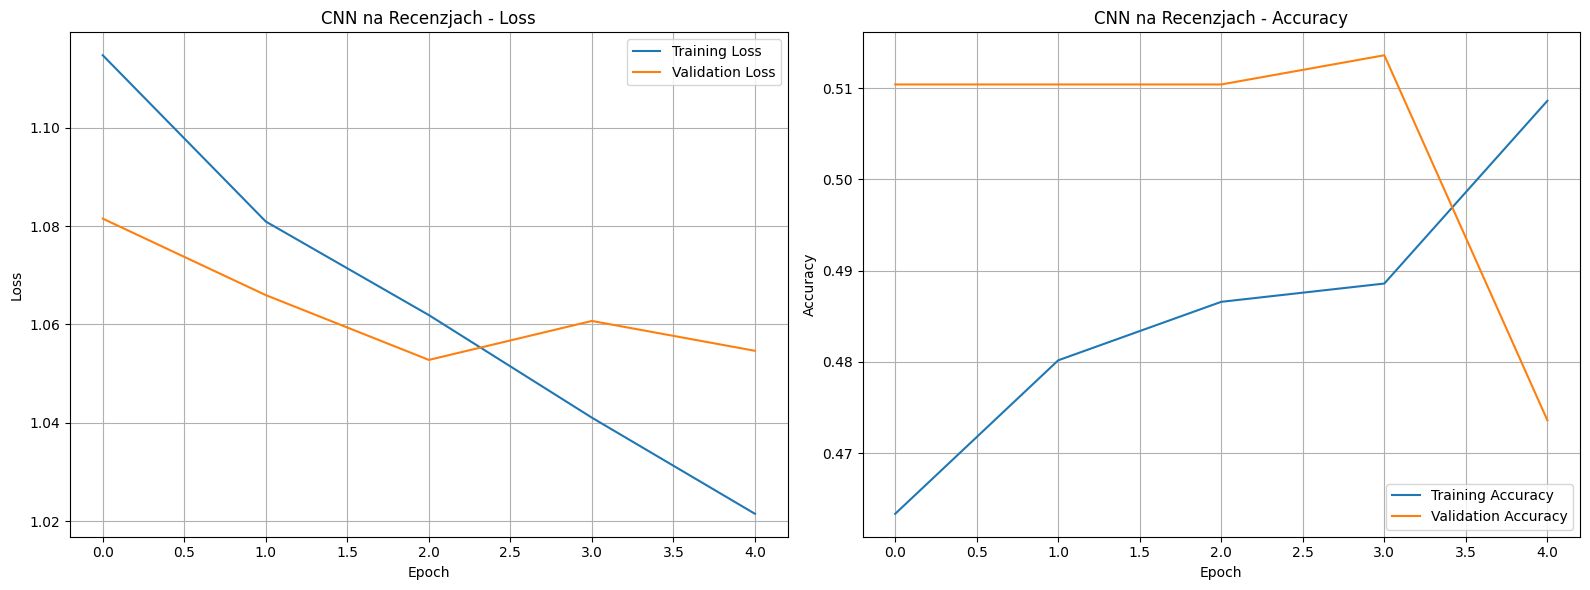

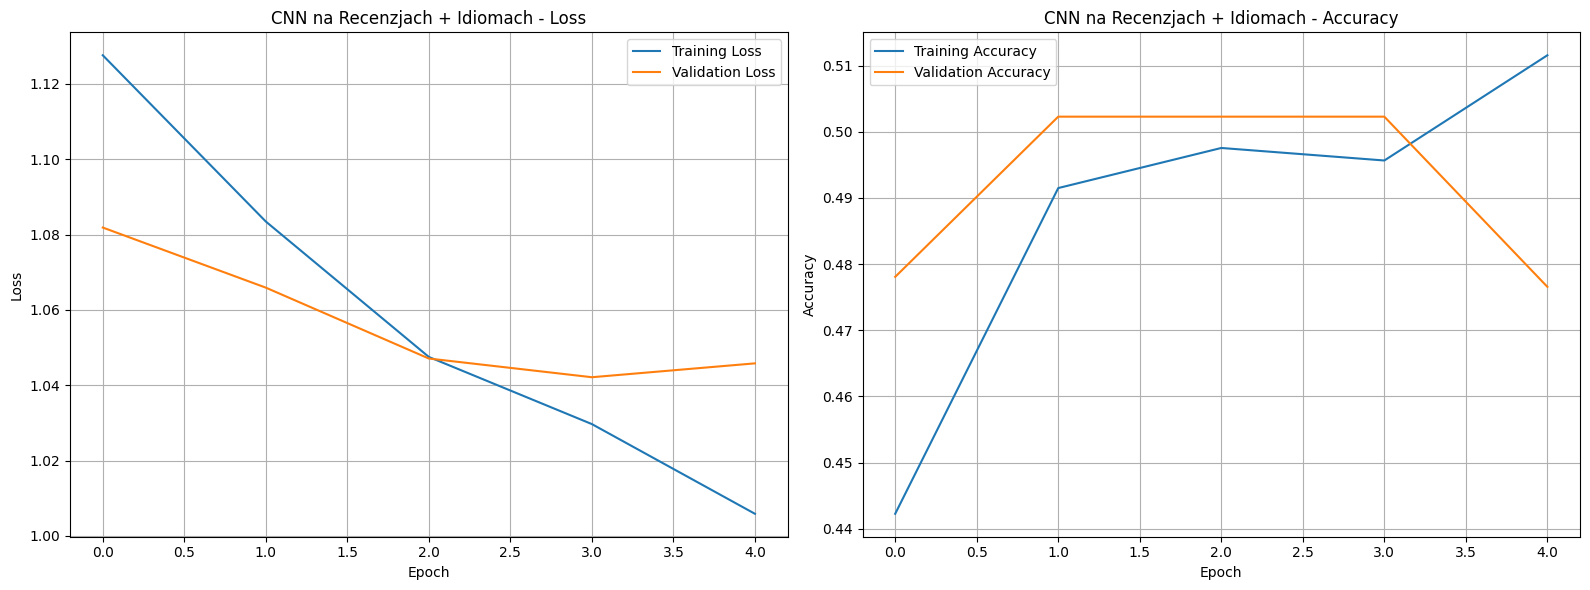

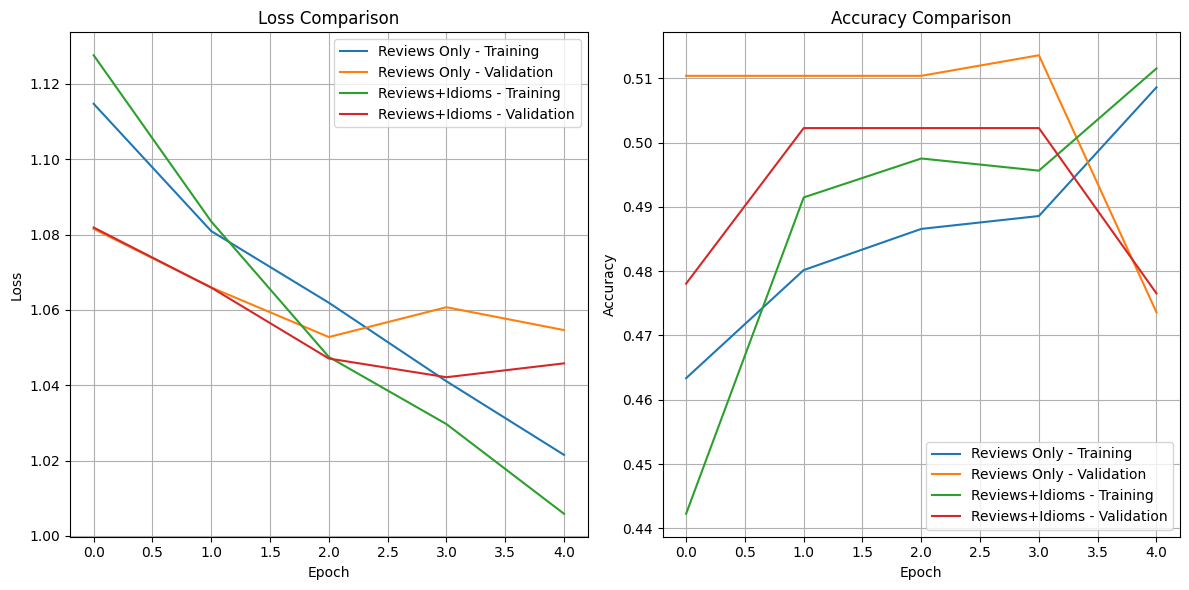

In [7]:
# The initial FastText model loading and text preprocessing remains the same
# First, verify GPU is available in Colab
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Install necessary libraries if not already available
# !pip install gensim scikit-learn nltk pandas

import urllib.request
import pandas as pd
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from gensim.models import FastText
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GRU, LSTM, Embedding, Input, Dropout, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time
import os

# Use GPU for tensor operations
with tf.device('/GPU:0'):
    # Download NLTK data if needed
    nltk.download('punkt_tab')

    # # Set up paths for KGR10 FastText model
    # model_url = "https://huggingface.co/clarin-pl/fasttext-kgr10/resolve/main/kgr10.plain.skipgram.dim100.neg10.bin"
    # model_path = "kgr10.plain.skipgram.dim100.neg10.bin"

    # # Download model if it doesn't exist
    # if not os.path.exists(model_path):
    #     print(f"Downloading KGR10 FastText model from {model_url}...")
    #     urllib.request.urlretrieve(model_url, model_path)
    #     print("Download complete!")
    # else:
    #     print(f"Using existing model at {model_path}")

    import urllib.request

    model_url = "https://huggingface.co/clarin-pl/fasttext-kgr10/resolve/main/kgr10.plain.skipgram.dim100.neg10.bin"
    model_path = "kgr10.plain.skipgram.dim100.neg10.bin"

    # Delete existing model file if it exists
    if os.path.exists(model_path):
        os.remove(model_path)
        print(f"Deleted existing model file at {model_path}")

    # Re-download the model
    print(f"Downloading KGR10 FastText model from {model_url}...")
    urllib.request.urlretrieve(model_url, model_path)
    print("Download complete!")

# ... (rest of your code) ...
    # Load the FastText model
    print("Loading KGR10 FastText model...")
    model = FastText.load_fasttext_format(model_path)
    print(f"Model loaded! Vector size: {model.vector_size}")

    # Load datasets
    print("Loading datasets...")
    reviews = pd.read_csv("filmweb_jednolity_sentyment.csv")
    reviews_with_idioms = pd.read_csv('filmweb_i_idiomy.csv')
    print(f"Loaded {len(reviews)} reviews and {len(reviews_with_idioms)} reviews with idioms")

    # Text preprocessing
    def preprocess_text(text):
        # Handle NaN values
        if isinstance(text, float) and np.isnan(text):
            return ""

        text = str(text).lower()
        text = re.sub(r'[^\w\s]', '', text)
        words = text.split()
        return ' '.join(words)

    # Apply text preprocessing
    print("Preprocessing text...")
    reviews['review_processed'] = reviews['review'].apply(preprocess_text)
    reviews_with_idioms['review_processed'] = reviews_with_idioms['review'].apply(preprocess_text)

    # Modified vectorization for CNN: We need sequences of word vectors instead of averaging
    def create_sequence_vectors(texts, model, max_length=100):
        # Get sequence of vectors for each text
        def get_sequence_embeddings(text):
            if not text:  # Handle empty strings
                return [np.zeros(model.vector_size)]

            words = word_tokenize(text.lower())
            word_vectors = []
            for word in words[:max_length]:  # Limit sequence length
                try:
                    # Get vector for the word
                    word_vectors.append(model.wv[word])
                except KeyError:
                    # Skip words not in vocabulary
                    continue

            if not word_vectors:
                return [np.zeros(model.vector_size)]
            return word_vectors

        # Process each text in the batch
        sequences = [get_sequence_embeddings(text) for text in texts]

        # Pad sequences to max_length
        padded_sequences = pad_sequences(
            [seq for seq in sequences],
            maxlen=max_length,
            padding='post',
            dtype='float32',
            value=0.0
        )

        return padded_sequences

    # Process reviews in batches to utilize GPU efficiently
    def process_in_batches(df, batch_size=128, max_length=100):
        all_sequences = []
        start_time = time.time()

        for i in range(0, len(df), batch_size):
            batch_texts = df['review_processed'].iloc[i:i+batch_size].values
            batch_sequences = create_sequence_vectors(batch_texts, model, max_length)
            all_sequences.append(batch_sequences)

            # Print progress
            if (i+batch_size) % 1000 == 0 or i+batch_size >= len(df):
                elapsed = time.time() - start_time
                print(f"Processed {i+len(batch_texts)}/{len(df)} reviews in {elapsed:.2f} seconds")

        return np.vstack(all_sequences)

    # Create sequence vectors with GPU acceleration
    MAX_SEQ_LENGTH = 100  # Maximum sequence length
    print("Creating sequence vectors using GPU...")
    reviews_sequences = process_in_batches(reviews, max_length=MAX_SEQ_LENGTH)
    reviews_with_idioms_sequences = process_in_batches(reviews_with_idioms, max_length=MAX_SEQ_LENGTH)

# Prepare data for training
print("Preparing data for CNN training...")
X = reviews_sequences
y = reviews['sentiment'].values
X2 = reviews_with_idioms_sequences
y2 = reviews_with_idioms['sentiment'].values

# Convert labels to categorical for neural network
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y, num_classes=3)  # Assuming 3 sentiment classes (0, 1, 2)
y2_cat = to_categorical(y2, num_classes=3)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=12)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_cat, test_size=None, random_state=12)


# Build CNN model
from tensorflow.keras import regularizers

def build_cnn_model(input_shape, output_shape):
    model = Sequential()
    model.add(Conv1D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
    # Add Conv1D layers with different filter sizes to capture different n-gram patterns
    model.add(Conv1D(128, 3, activation='relu', input_shape=input_shape, padding='same'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(64, 4, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))

    # Global max pooling to reduce dimensionality
    model.add(GlobalMaxPooling1D())

    # Dense layers
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(output_shape, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

# Funkcja do wizualizacji historii treningu
import matplotlib.pyplot as plt
def plot_training_history(history, title_prefix, save_path=None):
    """
    Funkcja generująca wykresy dla historii treningu

    Args:
        history: Historia treningu modelu
        title_prefix: Prefiks tytułu dla wykresów
        save_path: Ścieżka do zapisania pliku (jeśli None, wykres zostanie wyświetlony)
    """
    # Utwórz figurę z dwoma wykresami obok siebie
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Wykres dla Loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{title_prefix} - Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Wykres dla Accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title(f'{title_prefix} - Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()

    # Zapisz lub wyświetl wykres
    if save_path:
        plt.savefig(save_path)
        print(f"Wykres zapisany w: {save_path}")
    else:
        plt.show()

# Train model on reviews only
print("Training CNN on reviews dataset...")
input_shape = (X_train.shape[1], X_train.shape[2])  # (sequence_length, embedding_dim)
output_shape = y_train.shape[1]  # Number of sentiment classes

start_time = time.time()
cnn_model = build_cnn_model(input_shape, output_shape)
history = cnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,  # Zwiększona liczba epok dla lepszej wizualizacji treningu
    batch_size=32,
    verbose=1
)
print(f"CNN training completed in {time.time() - start_time:.2f} seconds")

# Wizualizacja historii treningu dla modelu na samych recenzjach
plot_training_history(history, "CNN na Recenzjach", "cnn_reviews_history.png")

# Evaluate model without idioms
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy for CNN model trained on reviews only: {accuracy:.4f}")

# Train model on reviews + idioms
print("Training CNN on reviews + idioms dataset...")
input_shape2 = (X2_train.shape[1], X2_train.shape[2])
output_shape2 = y2_train.shape[1]

start_time = time.time()
cnn_model_idioms = build_cnn_model(input_shape2, output_shape2)
history2 = cnn_model_idioms.fit(
    X2_train, y2_train,
    validation_split=0.2,
    epochs=5,  # Zwiększona liczba epok dla lepszej wizualizacji treningu
    batch_size=32,
    verbose=1
)
print(f"CNN training completed in {time.time() - start_time:.2f} seconds")

# Wizualizacja historii treningu dla modelu na recenzjach z idiomami
plot_training_history(history2, "CNN na Recenzjach + Idiomach", "cnn_reviews_idioms_history.png")

# Evaluate model with idioms
y2_pred = np.argmax(cnn_model_idioms.predict(X_test), axis=1)
accuracy2 = accuracy_score(y_test_labels, y2_pred)
print(f"Accuracy for CNN model trained on reviews + idioms: {accuracy2:.4f}")

# Compare model performance
print("\nModel Performance Comparison:")
print(f"Reviews Only:        {accuracy:.4f}")
print(f"Reviews with Idioms: {accuracy2:.4f}")
print(f"Improvement:         {(accuracy2-accuracy)*100:.2f}%")

# Porównanie obu modeli na jednym wykresie
plt.figure(figsize=(12, 6))

# Wykres Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Reviews Only - Training')
plt.plot(history.history['val_loss'], label='Reviews Only - Validation')
plt.plot(history2.history['loss'], label='Reviews+Idioms - Training')
plt.plot(history2.history['val_loss'], label='Reviews+Idioms - Validation')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Wykres Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Reviews Only - Training')
plt.plot(history.history['val_accuracy'], label='Reviews Only - Validation')
plt.plot(history2.history['accuracy'], label='Reviews+Idioms - Training')
plt.plot(history2.history['val_accuracy'], label='Reviews+Idioms - Validation')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('cnn_models_comparison.png')
plt.show()

# Save models if needed
cnn_model.save('cnn_model_reviews_kgr10.h5')
cnn_model_idioms.save('cnn_model_reviews_idioms_kgr10.h5')
